In [1]:
%%capture

%pip install -r requirements.txt

In [2]:
import cudaq

import os
from getpass import getpass

api_key = os.getenv('IONQ_API_KEY') or getpass('Enter your IonQ API key: ')
os.environ['IONQ_API_KEY'] = api_key  # Remove when set_target takes api_key
cudaq.set_target('ionq', qpu='simulator')

In [3]:
import matplotlib.pyplot as plt

def plot_histogram(result: dict):
    # Extracting keys and values for plotting
    states = list(result.keys())
    counts = list(result.values())
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(states, counts)
    # Adding titles and labels
    plt.title('State Histogram')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.show()

In [4]:
# Define the kernel and allocate two qubits
kernel = cudaq.make_kernel()
qubits = kernel.qalloc(2)

# Apply a Hadamard gate to the first qubit
kernel.h(qubits[0])

# Apply a CX gate from the first to second qubit
kernel.cx(qubits[0], qubits[1])

# Execute the kernel on the computer and print the result
result = cudaq.sample(kernel)
result_dict = dict(result.items())
print(result_dict)

{'3': 50, '0': 50}


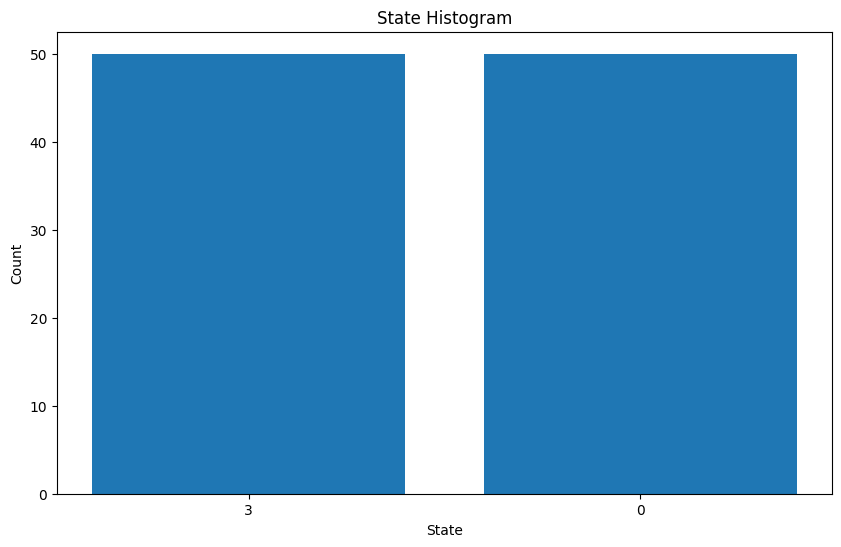

In [5]:
plot_histogram(result_dict)